# Plotting Predictor and Target Grids
Plotting to ensure all predictors and the target are processed correctly before grid selections/model use

## Predictors

sc_crust_vp_100km^2.nc


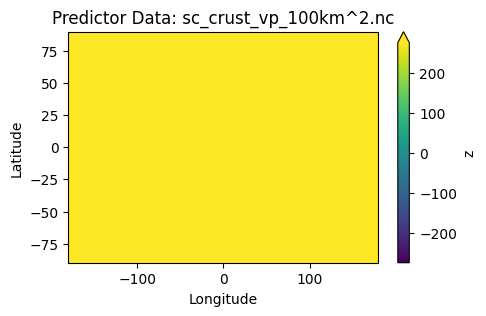

love_group_100km^2.nc


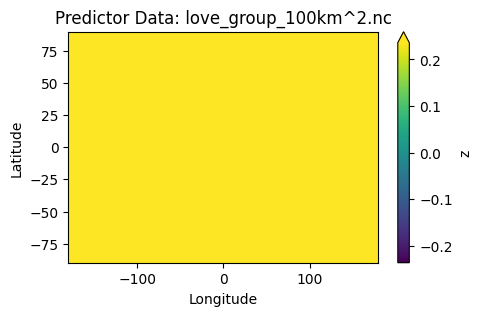

interpolated_interpolated_emm_100km^2.nc


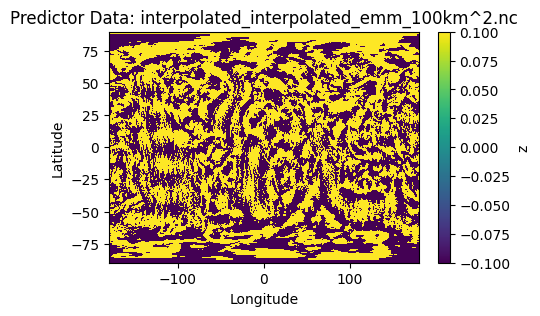

gl_elevation_100km^2.nc


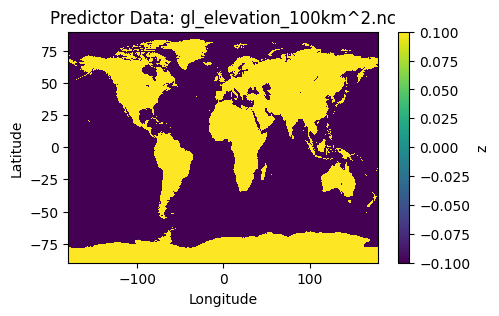

sc_crust_den_100km^2.nc


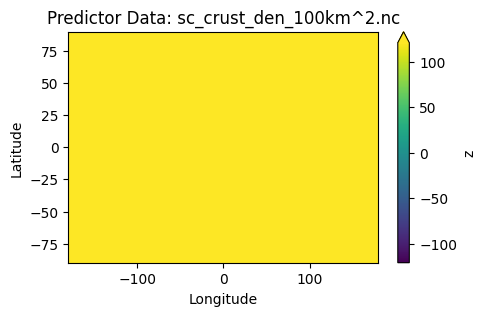

igrf_inc_100km^2.nc


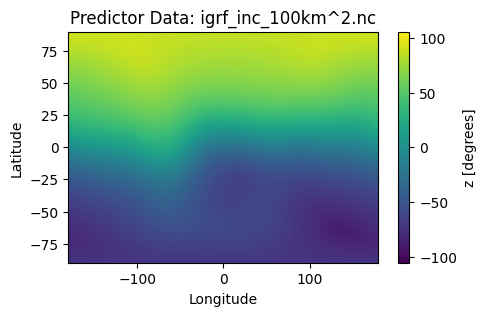

sl_vgg_eot_100km^2.nc


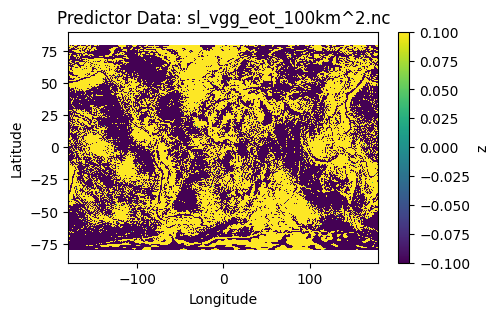

love_phase_100km^2.nc


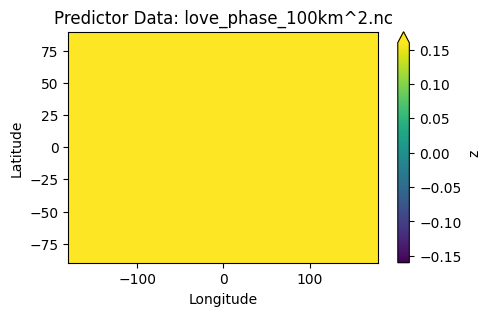

wgm2012_freeair_ponc_100km^2.nc


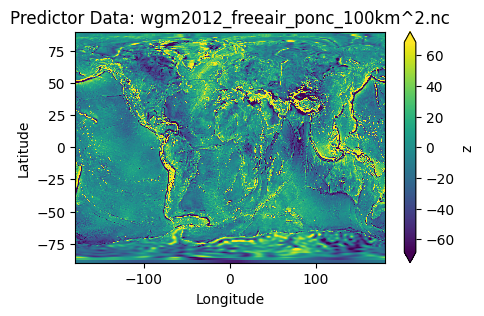

interpolated_interpolated_bouguer_100km^2.nc


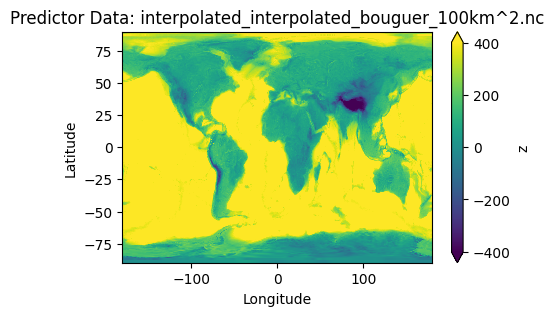

cm_curie_point_depth_100km^2.nc


/usr/local/lib/python3.10/dist-packages/xarray/plot/dataarray_plot.py:2331: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(y[0], y[-1])


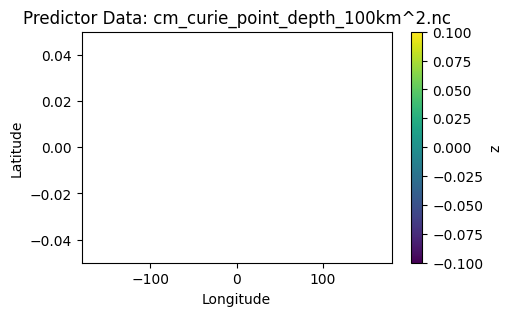

interpolated_interpolated_mf7_100km^2.nc


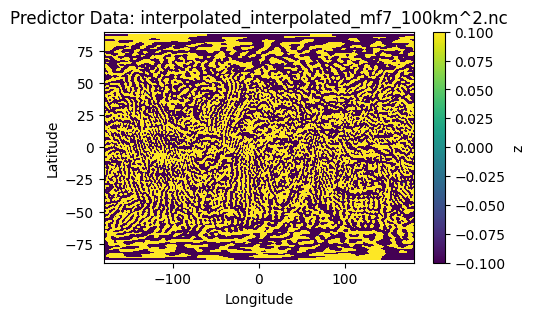

igrf_dec_100km^2.nc


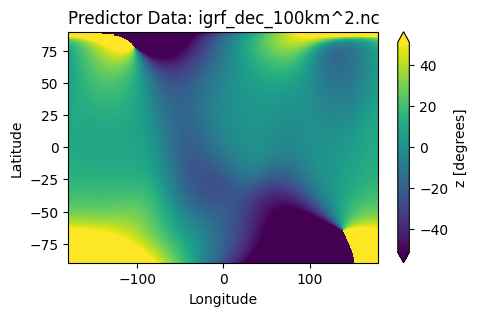

sc_crust_vs_100km^2.nc


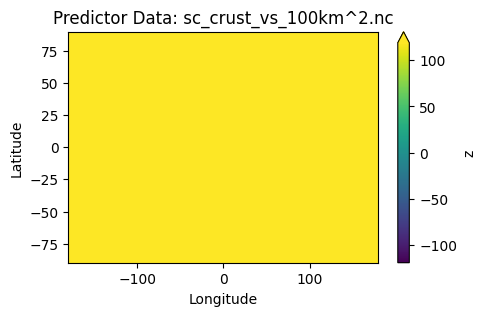

rayleigh_phase_100km^2.nc


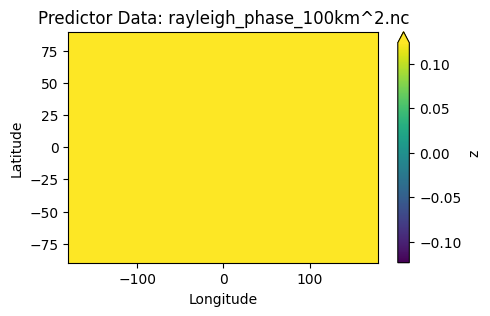

rayleigh_group_100km^2.nc


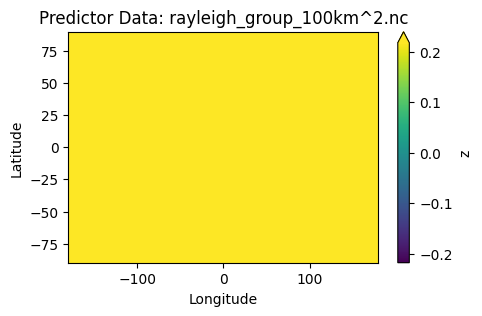

MF7_filled_EMAG.nc


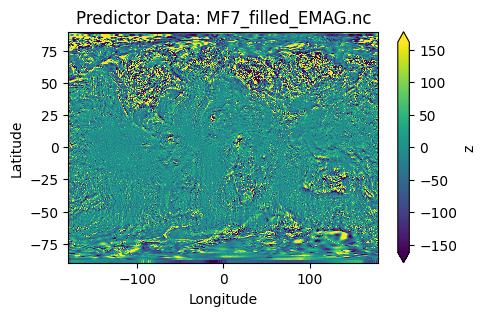

sc_crust_age_100km^2.nc


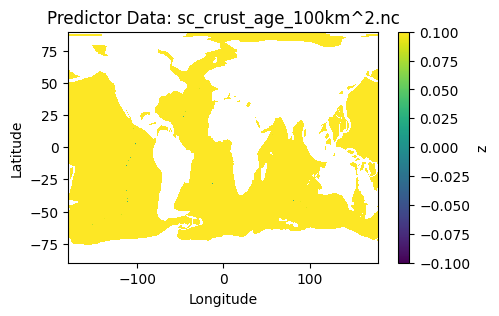

sed_thick_filled_100km^2.nc


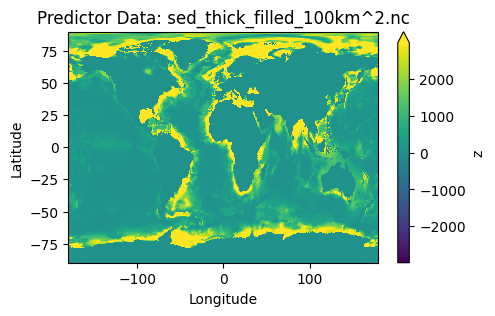

CM_CURIE_POINT_DEPTH_KM_Li2017.5m_EASE9262.68m.nc


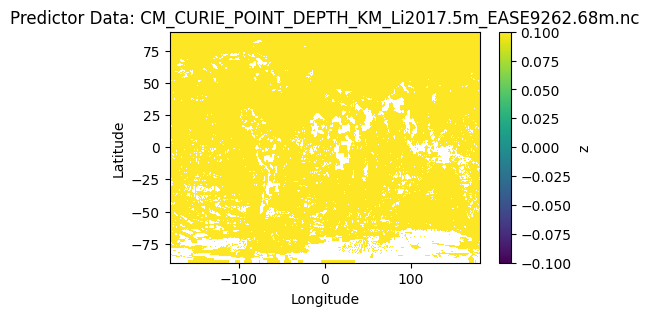

In [ ]:
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
import xarray as xr
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt

# Define the path to the predictors folder on Google Drive
predictors_folder = '/content/'

# List all files in the predictors folder
files = os.listdir(predictors_folder)

ranking_list = []

# Iterate over each file in the predictors folder
for file_name in files:
    file_path = os.path.join(predictors_folder, file_name)

    # Skip the emag target file itself
    if file_name == 'interpolated_emag_from_csv.nc' or not file_name.endswith('.nc'):
        continue

    # Open the predictor file
    data_array = xr.open_dataset(file_path)

    # Calculate standard deviation
    std_dev = np.std(data_array['z'].values.flatten())


  # Plot the predictor data array
    plt.figure(figsize=(5, 3))
    data_array['z'].plot( cmap='viridis')
    plt.title(f'Predictor Data: {file_name}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()




Plot of our target variable emag

## Target

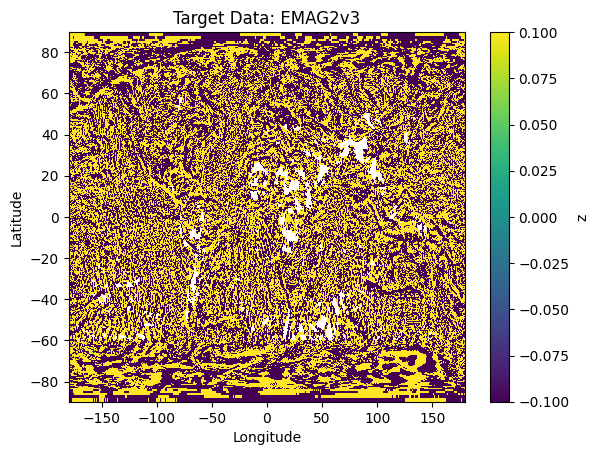

In [ ]:
emag = xr.open_dataset('/content/interpolated_emag_from_csv.nc')
scaler = StandardScaler()

processed_emag = xr.DataArray( emag['z'], dims=['lat','lon'], coords= {'lat': emag['lat'].values.flatten(), 'lon': emag['lon'].values.flatten()})

processed_emag.plot(vmin=np.percentile(emag['z'], 10), vmax=np.percentile(emag['z'], 90), cmap='viridis')
plt.title('Target Data: EMAG2v3')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()